In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
italy_df = pd.read_csv("italy-covid-daywise.csv")

In [4]:
italy_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


# Data Preparation and Cleaning

In [6]:
italy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [8]:
italy_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [7]:
italy_df.shape

(248, 4)

In [13]:
italy_df.isnull().sum()

date            0
new_cases       0
new_deaths      0
new_tests     113
dtype: int64

In [14]:
italy_df=italy_df.dropna() # remove those rows from the dataset which contains null

In [15]:
italy_df.isnull().sum()

date          0
new_cases     0
new_deaths    0
new_tests     0
dtype: int64

In [16]:
italy_df.shape

(135, 4)

In [17]:
italy_df= italy_df.reset_index(drop=True)
italy_df

,date,new_cases,new_deaths,new_tests
0,2020-04-20,3047.0,433.0,7841.0
1,2020-04-21,2256.0,454.0,28095.0
2,2020-04-22,2729.0,534.0,44248.0
3,2020-04-23,3370.0,437.0,37083.0
4,2020-04-24,2646.0,464.0,95273.0
...,...,...,...,...
130,2020-08-28,1409.0,5.0,65135.0
131,2020-08-29,1460.0,9.0,64294.0
132,2020-08-30,1444.0,1.0,53541.0
133,2020-08-31,1365.0,4.0,42583.0



# Exploratory Analysis and Visualization

What is the maximum number of cases in a day?

In [18]:
max_cases=italy_df['new_cases'].max()
print("the maximum number of cases in a day was", max_cases)

the maximum number of cases in a day was 3370.0


What are the total number of cases reported so far?

In [20]:
total_cases=italy_df.new_cases.sum()
print("Total cases =", total_cases)

Total cases = 93289.0


What is the average number of deaths in a day?

In [23]:
total_death =italy_df.new_deaths.sum()
print("Average deaths per day is", total_death/135)

Average deaths per day is 90.78518518518518


How the number of daily new cases and the number of daily new deaths evolve in Italy?

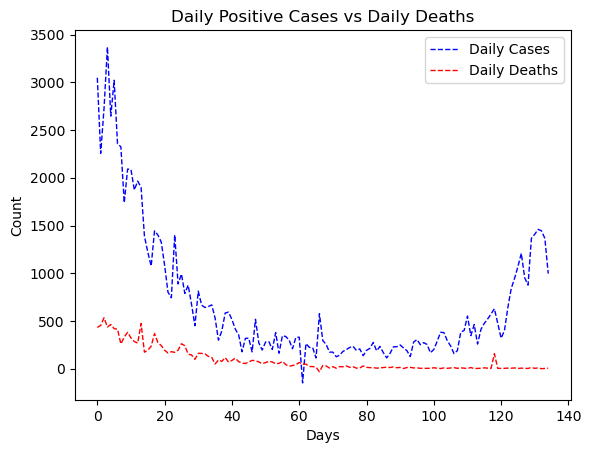

In [26]:
plt.plot(italy_df.new_cases,'b--', linewidth=1,markersize=5,markeredgewidth=2, markeredgecolor='navy')
plt.plot(italy_df.new_deaths, 'r--', linewidth=1,markersize=5,)
plt.title('Daily Positive Cases vs Daily Deaths')
plt.legend(['Daily Cases', 'Daily Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

From the graph it can be inferred that both the daily positive cases and daily deaths were very high initially 
but with increase in time gradually there was a drop in the number of cases and deaths

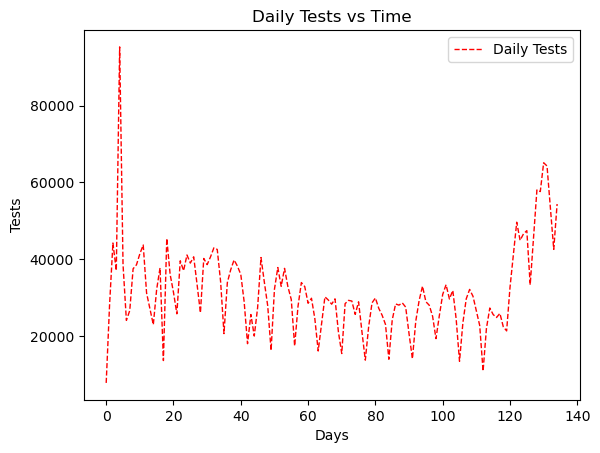

In [27]:
plt.plot(italy_df.new_tests, 'r--', linewidth=1, markersize=5,)
plt.title('Daily Tests vs Time')
plt.legend(['Daily Tests'])
plt.xlabel('Days'); plt.ylabel('Tests');

From this graph we can say that the number of tests conducted daily varied inconsistently

# Plot a graph to determine the plot which recorded high cases in a day in Italy

In [29]:
italy_df.new_cases.describe()

count     135.00000
mean      691.02963
std       699.83997
min      -148.00000
25%       230.50000
50%       382.00000
75%       882.00000
max      3370.00000
Name: new_cases, dtype: float64

In [30]:
high_positive_cases_df = italy_df[italy_df.new_cases > 1500]
high_positive_cases_df

,date,new_cases,new_deaths,new_tests
0,2020-04-20,3047.0,433.0,7841.0
1,2020-04-21,2256.0,454.0,28095.0
2,2020-04-22,2729.0,534.0,44248.0
3,2020-04-23,3370.0,437.0,37083.0
4,2020-04-24,2646.0,464.0,95273.0
5,2020-04-25,3021.0,420.0,38676.0
6,2020-04-26,2357.0,415.0,24113.0
7,2020-04-27,2324.0,260.0,26678.0
8,2020-04-28,1739.0,333.0,37554.0
9,2020-04-29,2091.0,382.0,38589.0


Text(0, 0.5, 'Date')

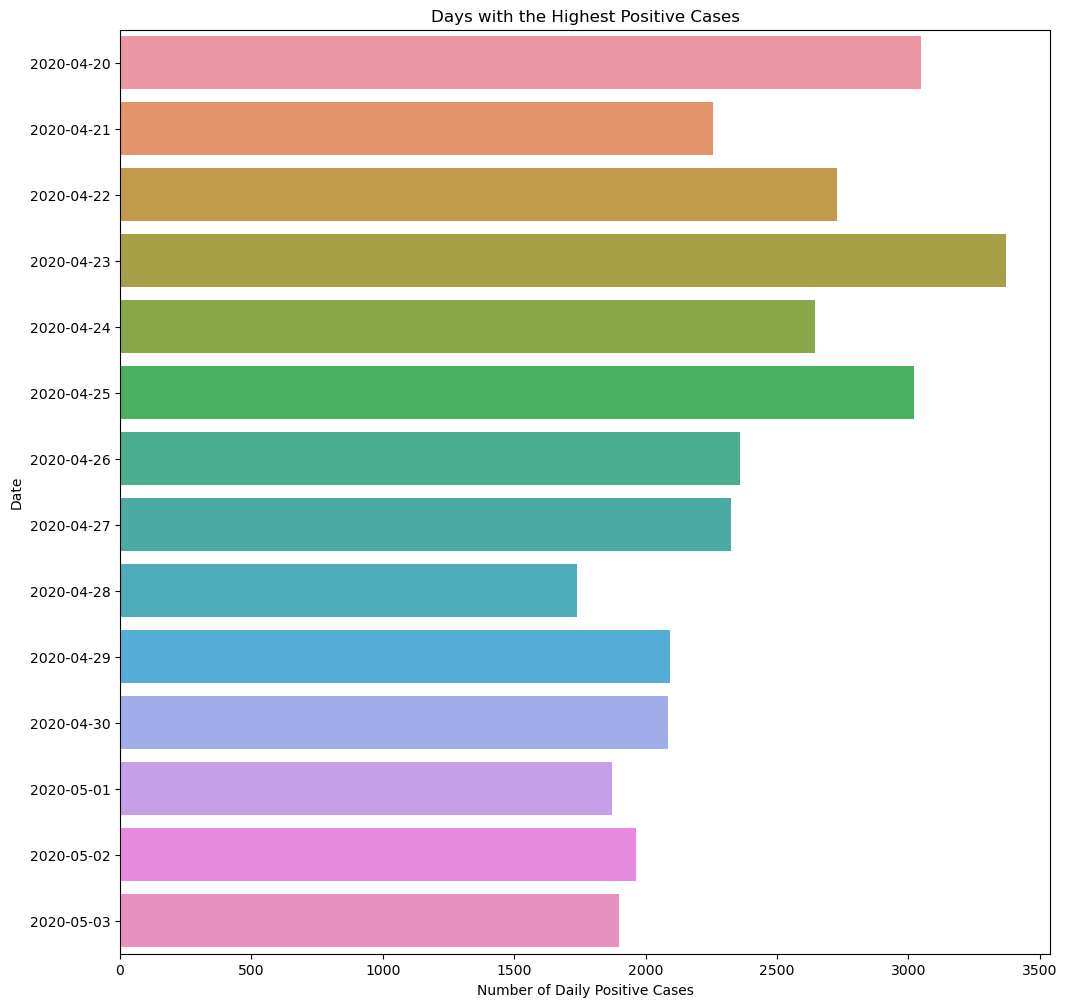

In [38]:
plt.figure(figsize=(12,12))
sns.barplot(x='new_cases', y='date', data=high_positive_cases_df)
plt.title('Days with the Highest Positive Cases')
plt.xlabel('Number of Daily Positive Cases')
plt.ylabel('Date')

 This is a graph which show the dates when the number of new cases in a single day was > 1500
